In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
# Assuming your text file is named "data.txt" and is in the same directory as your Python script
file_path = "/content/41002h2022 (1).txt"

# If your data is separated by spaces, you can use:
df = pd.read_csv(file_path, delim_whitespace=True)

In [3]:
df.head()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2022,1,1,0,0,304,1.7,3.0,99.00,99.00,99.00,999,1016.9,23.4,24.1,20.3,99.0,99.0
1,2022,1,1,0,10,289,2.0,2.8,99.00,99.00,99.00,999,1017.1,23.4,24.1,20.4,99.0,99.0
2,2022,1,1,0,20,292,2.5,3.7,99.00,99.00,99.00,999,1017.2,23.4,24.2,20.4,99.0,99.0
3,2022,1,1,0,30,285,1.8,3.1,99.00,99.00,99.00,999,1017.3,23.4,24.2,20.5,99.0,99.0
4,2022,1,1,0,40,292,1.8,3.0,1.73,7.14,6.05,270,1017.5,23.4,24.2,20.5,99.0,99.0


In [4]:
# Remove the first row
df = df.iloc[1:]
df.head()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2022,1,1,0,10,289,2.0,2.8,99.00,99.00,99.00,999,1017.1,23.4,24.1,20.4,99.0,99.0
2,2022,1,1,0,20,292,2.5,3.7,99.00,99.00,99.00,999,1017.2,23.4,24.2,20.4,99.0,99.0
3,2022,1,1,0,30,285,1.8,3.1,99.00,99.00,99.00,999,1017.3,23.4,24.2,20.5,99.0,99.0
4,2022,1,1,0,40,292,1.8,3.0,1.73,7.14,6.05,270,1017.5,23.4,24.2,20.5,99.0,99.0
5,2022,1,1,0,50,289,2.0,3.0,99.00,99.00,99.00,999,1017.6,23.3,24.2,20.2,99.0,99.0


In [5]:
df.shape

(12948, 18)

In [6]:
# Convert specific columns to numeric values
columns_to_convert = ['#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
# Alternatively, convert all object columns to numeric values
df = df.apply(pd.to_numeric, errors='coerce')

In [7]:
# Extract rows where mm=0
df = df[df["mm"] == 40]

In [8]:
#here we reset the index
df = df.reset_index(drop=True)

In [9]:
df.shape

(2159, 18)

In [10]:
df.isnull().sum()

#YY     0
MM      0
DD      0
hh      0
mm      0
WDIR    0
WSPD    0
GST     0
WVHT    0
DPD     0
APD     0
MWD     0
PRES    0
ATMP    0
WTMP    0
DEWP    0
VIS     0
TIDE    0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.shape

(2159, 18)

In [13]:
# Combine date and time columns into a single datetime column
df['date_time'] = pd.to_datetime(df[['#YY', 'MM', 'DD', 'hh', 'mm']].astype(str).apply(' '.join, axis=1), format='%Y %m %d %H %M')

In [14]:
# Drop 5 columns by specifying their column labels
columns_to_drop = ['#YY', 'MM', 'DD', 'hh', 'mm']
df = df.drop(columns=columns_to_drop)

In [15]:
#Move the 'date_time' column to the first position
date_time_column = df.pop('date_time')
df.insert(0, 'date_time', date_time_column)

In [16]:
df.head()

,date_time,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2022-01-01 00:40:00,292,1.8,3.0,1.73,7.14,6.05,270,1017.5,23.4,24.2,20.5,99.0,99.0
1,2022-01-01 01:40:00,238,1.6,2.5,1.58,7.14,5.76,259,1017.6,23.3,24.3,20.5,99.0,99.0
2,2022-01-01 02:40:00,250,2.5,3.6,1.68,7.14,6.13,269,1017.7,23.3,24.3,20.9,99.0,99.0
3,2022-01-01 03:40:00,238,3.5,4.6,1.52,6.67,5.82,268,1017.6,23.4,24.3,20.6,99.0,99.0
4,2022-01-01 04:40:00,230,4.9,6.1,1.50,7.14,6.02,254,1017.1,23.3,24.3,20.7,99.0,99.0


In [17]:
df["WVHT"]=df["WVHT"].astype(float)

In [18]:
# Assuming you have a DataFrame called 'df'
selected_columns = ['date_time' , 'WVHT']  # Specify the columns you want to select

data = df[selected_columns]  # Create a new DataFrame by selecting the specified columns

# Print the new DataFrame
print(data)

               date_time  WVHT
0    2022-01-01 00:40:00  1.73
1    2022-01-01 01:40:00  1.58
2    2022-01-01 02:40:00  1.68
3    2022-01-01 03:40:00  1.52
4    2022-01-01 04:40:00  1.50
...                  ...   ...
2154 2022-03-31 19:40:00  2.10
2155 2022-03-31 20:40:00  2.26
2156 2022-03-31 21:40:00  2.45
2157 2022-03-31 22:40:00  2.32
2158 2022-03-31 23:40:00  2.11

[2159 rows x 2 columns]


In [19]:
unique_values = data['WVHT'].unique()
unique_values

array([ 1.73,  1.58,  1.68,  1.52,  1.5 ,  1.29,  1.26,  1.2 ,  1.05,
        1.02,  1.  ,  1.01,  0.96,  1.04,  1.13,  1.18,  1.24,  1.31,
        1.33,  1.35,  1.49,  1.4 ,  1.51,  1.43,  1.48,  1.65,  1.85,
        1.91,  2.01,  2.1 ,  2.17,  2.04,  2.27,  2.15,  2.31,  2.21,
        2.14,  2.35,  2.28,  2.2 ,  2.22,  2.3 ,  2.11,  1.98,  2.13,
        2.25,  2.34,  2.45,  2.43,  2.65,  2.44,  3.16,  3.27,  3.37,
        3.53,  3.77,  3.96,  4.77,  5.17,  4.9 ,  5.28,  5.33,  6.19,
        5.13,  4.85,  4.87,  4.13,  3.78,  4.01,  3.82,  3.89,  3.26,
        4.08,  4.17,  4.19,  3.95,  3.91,  3.9 ,  3.75,  3.83,  3.74,
        4.09,  4.31,  4.37,  4.49,  4.53,  4.67,  5.34,  4.51,  4.54,
        3.71,  3.7 ,  3.55,  2.86,  2.92,  2.74,  2.64,  2.76,  2.62,
        2.52,  2.69,  2.78,  2.49,  2.33,  2.18,  2.03,  2.02,  1.89,
        1.75,  1.77,  1.69,  1.6 ,  1.55,  1.57,  1.74,  1.93,  1.94,
        2.12,  2.26,  2.32,  2.38,  2.55,  2.6 ,  2.42,  2.36,  2.81,
        2.91,  3.31,

In [20]:
data = data[data['WVHT'] != 99]

In [21]:
data.shape

(2155, 2)

<Axes: >

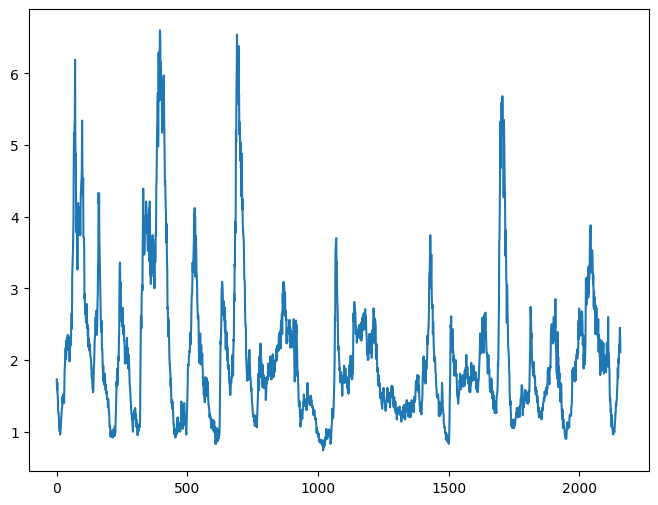

In [22]:
data['WVHT'].plot(figsize=(8,6))

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [24]:
data['date_time'] = pd.to_datetime(data['date_time'])
data = data.sort_values(by='date_time')
y = data['WVHT'].values

In [25]:
# Define a function to prepare sequences
def prepare_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

In [26]:
# Prepare sequences and targets
sequence_length = 100  # Adjust as needed
x_seq, y_targets = prepare_sequences(y, sequence_length)

In [27]:
# Split the data into train and test sets
split_ratio = 0.7  # Adjust as needed
split_idx = int(split_ratio * len(x_seq))
x_train, x_test = x_seq[:split_idx], x_seq[split_idx:]
y_train, y_test = y_targets[:split_idx], y_targets[split_idx:]

In [28]:
# Define quantile loss function using TensorFlow operations
def quantile_loss(q, y_true, y_pred):
    error = y_true - y_pred
    return tf.reduce_mean(tf.maximum(q * error, (q - 1) * error))

In [29]:
# Import the Dropout layer from TensorFlow
from tensorflow.keras.layers import Dropout

In [30]:
from tensorflow.keras.layers import Input, GRU, LSTM, Dropout, Dense, Concatenate
from tensorflow.keras.models import Model
import tensorflow as tf
from keras.utils import plot_model, model_to_dot

In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, LSTM, SimpleRNN, Concatenate, Dense
from tensorflow.keras.optimizers import Adam

def train_model_with_quantile_loss(q):
    # Define input shape
    input_shape = (sequence_length, 1)
    inputs = Input(shape=input_shape)

    # GRU layer
    gru_output = GRU(64, activation='sigmoid')(inputs)

    # LSTM layer
    lstm_output = LSTM(64, activation='sigmoid')(inputs)

    # Concatenate the outputs of three layers
    concatenated = Concatenate()([gru_output, lstm_output])

    # Dense layer
    dense_output = Dense(64, activation='relu')(concatenated)

    # Output layer
    output = Dense(1)(dense_output)

    # Create the model
    model = Model(inputs=inputs, outputs=output)

    # Compile the model with quantile loss
    model.compile(optimizer=Adam(learning_rate=0.0001), loss=lambda y_true, y_pred: quantile_loss(q, y_true, y_pred))

    # Train the model
    model.fit(x_train, y_train, validation_split=0.1, epochs=100, batch_size=32, verbose=1)

    return model

In [32]:
#Train models with 20% and 80% quantiles
q_05 = 0.05  # 10% quantile
model_05 = train_model_with_quantile_loss(q_05)

Epoch 1/100
41/41 [==============================] - 8s 123ms/step - loss: 0.0607 - val_loss: 0.0506
Epoch 2/100
41/41 [==============================] - 3s 70ms/step - loss: 0.0591 - val_loss: 0.0459
Epoch 3/100
41/41 [==============================] - 3s 71ms/step - loss: 0.0586 - val_loss: 0.0452
Epoch 4/100
41/41 [==============================] - 3s 70ms/step - loss: 0.0572 - val_loss: 0.0467
Epoch 5/100
41/41 [==============================] - 4s 101ms/step - loss: 0.0563 - val_loss: 0.0441
Epoch 6/100
41/41 [==============================] - 3s 81ms/step - loss: 0.0552 - val_loss: 0.0467
Epoch 7/100
41/41 [==============================] - 3s 70ms/step - loss: 0.0539 - val_loss: 0.0425
Epoch 8/100
41/41 [==============================] - 3s 71ms/step - loss: 0.0530 - val_loss: 0.0406
Epoch 9/100
41/41 [==============================] - 3s 85ms/step - loss: 0.0506 - val_loss: 0.0395
Epoch 10/100
41/41 [==============================] - 4s 97ms/step - loss: 0.0491 - val_loss: 0.03

In [33]:
q_95 = 0.95  # 90% quantile
model_95 = train_model_with_quantile_loss(q_95)

Epoch 1/100
41/41 [==============================] - 8s 114ms/step - loss: 1.4181 - val_loss: 0.6689
Epoch 2/100
41/41 [==============================] - 3s 72ms/step - loss: 0.6534 - val_loss: 0.2122
Epoch 3/100
41/41 [==============================] - 3s 71ms/step - loss: 0.3671 - val_loss: 0.1098
Epoch 4/100
41/41 [==============================] - 3s 81ms/step - loss: 0.2644 - val_loss: 0.0844
Epoch 5/100
41/41 [==============================] - 4s 104ms/step - loss: 0.2228 - val_loss: 0.0783
Epoch 6/100
41/41 [==============================] - 3s 71ms/step - loss: 0.1973 - val_loss: 0.0781
Epoch 7/100
41/41 [==============================] - 3s 72ms/step - loss: 0.1794 - val_loss: 0.0828
Epoch 8/100
41/41 [==============================] - 3s 71ms/step - loss: 0.1672 - val_loss: 0.0904
Epoch 9/100
41/41 [==============================] - 5s 114ms/step - loss: 0.1601 - val_loss: 0.0971
Epoch 10/100
41/41 [==============================] - 3s 74ms/step - loss: 0.1558 - val_loss: 0.1

In [34]:
# Make predictions
y_pred_05 = model_05.predict(x_test)
y_pred_95 = model_95.predict(x_test)

20/20 [==============================] - 1s 19ms/step


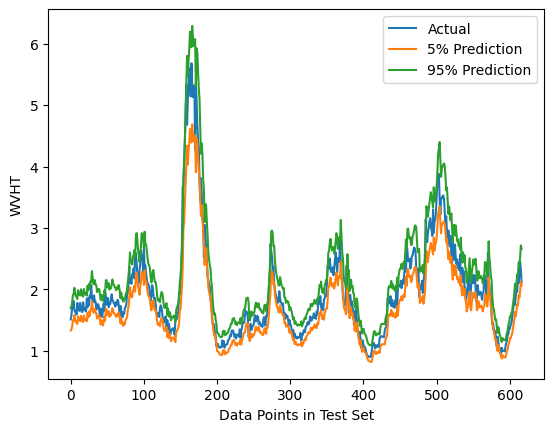

In [35]:
# Plot quantile predictions along with actual values
plt.plot(range(len(y_test)), y_test, label="Actual")
plt.plot(range(len(y_test)), y_pred_05, label="5% Prediction")
plt.plot(range(len(y_test)), y_pred_95, label="95% Prediction")
plt.xlabel("Data Points in Test Set")
plt.ylabel("WVHT")
plt.legend()
plt.savefig('41002h2021.png')
plt.show()

# Calculate the number of points between 95% and 5% percentiles
num_points_between_percentiles = np.sum((y_pred_05 <= y_test) & (y_test <= y_pred_95))

In [36]:
# Calculate MPIW
def calculate_mpiw(y_lower, y_upper):
    mpiw = np.mean(y_upper - y_lower)
    return mpiw

# Calculate lower and upper bounds of prediction intervals
y_lower_05 = y_pred_05
y_upper_95 = y_pred_95

# Calculate MPIW for the 10-90% prediction interval
mpiw = calculate_mpiw(y_lower_05, y_upper_95)

# Print MPIW for the 10-90% prediction interval
print("MPIW:", mpiw)

MPIW: 0.5045736


In [37]:
print(len(y_test))

617


In [38]:
# Check if each actual observation falls within the prediction interval
within_interval = (y_pred_05.flatten() <= y_test) & (y_test <= y_pred_95.flatten())
print(within_interval.sum())

559


In [39]:
# Check if each actual observation falls within the prediction interval
within_interval = (y_pred_05.flatten() <= y_test) & (y_test <= y_pred_95.flatten())

# Count the number of observations falling within the prediction intervals
num_within_interval = within_interval.sum()

# Total number of observations
total_observations = len(y_test)

# Calculate PICP (Prediction Interval Coverage Probability)
picp = num_within_interval / total_observations
print("PICP:", picp)

PICP: 0.9059967585089141
